# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [2]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Sample narrative description.

* isnull() checks for null values in each column and sum() function adds them up.
* Transmission coumn has most no.of null values with 65353
* vin has the least no. of null values with 4

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

Sample narrative description.

* The columns make, model, trim, body, transmission, vin, state, condition, color,interior, seller, mmr, saledate have incorrect type

In [5]:
df=df.convert_dtypes()
df.dtypes

year              Int64
make             string
model            string
trim             string
body             string
transmission     string
vin              string
state            string
condition        string
odometer        Float64
color            string
interior         string
seller           string
mmr              string
sellingprice      Int64
saledate         string
dtype: object

In [6]:
df['condition'] = pd.to_numeric(df['condition'],errors='coerce')
df['mmr'] = pd.to_numeric(df['mmr'],errors='coerce')
df.dtypes

year              Int64
make             string
model            string
trim             string
body             string
transmission     string
vin              string
state            string
condition       float64
odometer        Float64
color            string
interior         string
seller           string
mmr             float64
sellingprice      Int64
saledate         string
dtype: object

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [7]:
df.make.sort_values().unique()

<StringArray>
[        'Acura',  'Aston Martin',          'Audi',           'BMW',
       'Bentley',         'Buick',      'Cadillac',     'Chevrolet',
      'Chrysler',        'Daewoo',         'Dodge',          'FIAT',
       'Ferrari',        'Fisker',          'Ford',           'GMC',
           'Geo',        'HUMMER',         'Honda',       'Hyundai',
      'Infiniti',         'Isuzu',        'Jaguar',          'Jeep',
           'Kia',   'Lamborghini',    'Land Rover',         'Lexus',
       'Lincoln',         'Lotus',          'MINI',      'Maserati',
         'Mazda', 'Mercedes-Benz',       'Mercury',    'Mitsubishi',
        'Nissan',    'Oldsmobile',      'Plymouth',       'Pontiac',
       'Porsche',           'Ram',   'Rolls-Royce',          'Saab',
        'Saturn',         'Scion',        'Subaru',        'Suzuki',
         'Tesla',        'Toyota',    'Volkswagen',         'Volvo',
         'acura',     'airstream',          'audi',           'bmw',
         'buick',   

Sample narrative description.

In [8]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['<na>',
 'acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 '

In [9]:
df['make'] = df['make'].str.strip()
df['make'] = df['make'].str.lower()
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['<na>',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc truck',
 'honda',
 'hummer',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo',
 'vw']

Sample narrative description.

* There are duplicates in the 'make' column. I have removed duplicates by eliminating the extra space and lower casing all values.

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [10]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [11]:
df['mmr'].fillna(0, inplace=True)
df['sellingprice'].fillna(0, inplace=True)
df['sellingprice'] = df['sellingprice'].astype(float)

In [12]:
correlation = df['mmr'].corr(df['sellingprice'])
print(correlation)

0.9835870285181985


In [13]:
df['sellingprice'].describe()

count    558837.000000
mean      13611.264979
std        9749.430357
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

In [14]:
bins = [i for i in range(10000,240000,10000)]
corr1 = []
l = len(bins)
i = 0
while(l > 0):
    df_range = df[df['sellingprice'].le(i)]
    df_range = df[df['sellingprice'] <= bins[i]]
    corr = df_range['mmr'].corr(df_range['sellingprice'])
    corr1.append(corr)
    l = l - 1
    i = i + 1
print(corr1)

[0.874354272124959, 0.958254401580129, 0.9743303310721133, 0.9791015384205135, 0.981213272434161, 0.9821859794788873, 0.9826561583534845, 0.9831359350008368, 0.983377698026048, 0.9835274602354837, 0.983541523870991, 0.9836243932931281, 0.9836975515736245, 0.9837664854579146, 0.9838402072649178, 0.9839102917616461, 0.983960951191315, 0.9839758696044499, 0.9839845315500066, 0.9839845315500066, 0.9839845315500066, 0.9839845315500066, 0.9835870285181985]


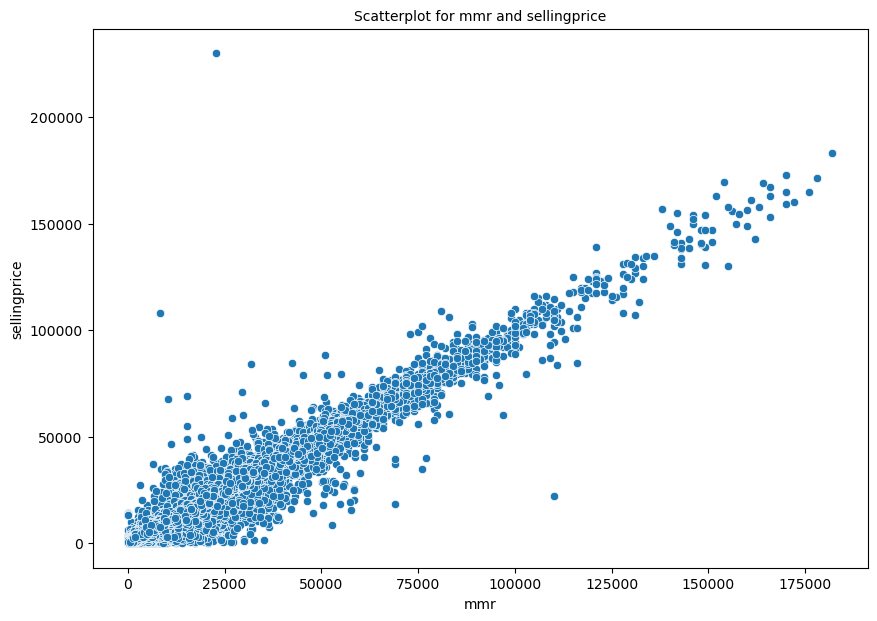

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x=df['mmr'], y=df['sellingprice'])
plt.xlabel('mmr', fontsize= 10)
plt.ylabel('sellingprice', fontsize= 10)
plt.title('Scatterplot for mmr and sellingprice', fontsize= 10)
plt.show()

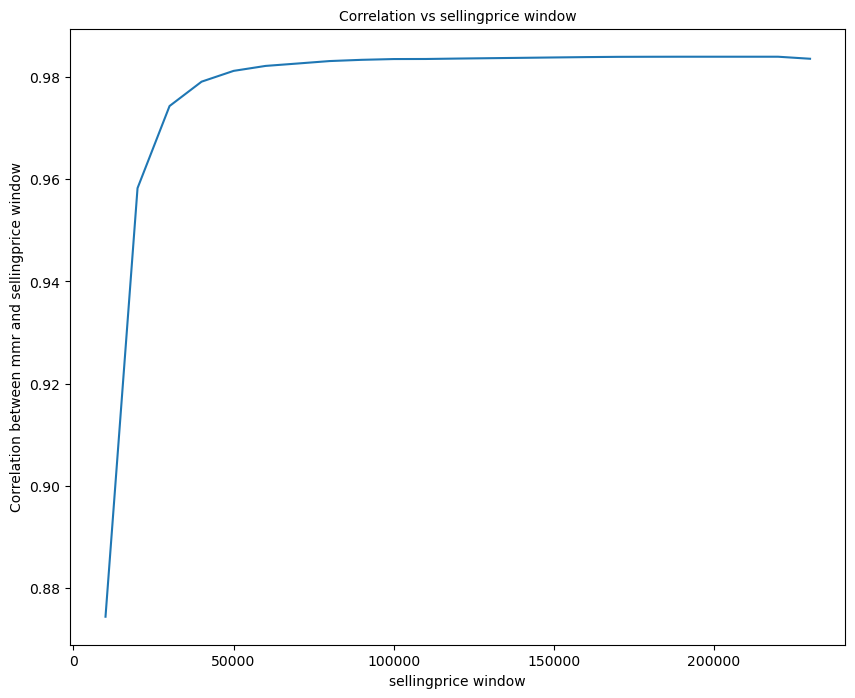

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(bins, corr1)
plt.xlabel('sellingprice window', fontsize=10)
plt.ylabel('Correlation between mmr and sellingprice window', fontsize=10)
plt.title('Correlation vs sellingprice window', fontsize=10)
plt.show()

Sample narrative description.

* As the Selling price window increases, correlation also increases.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [17]:
df1=df.copy()
df_yearselect = df1[(df1['year'] >= 2010) & (df1['year'] <= 2015)]
df_yearselect

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,kia,K900,Luxury,Sedan,<NA>,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,bmw,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [18]:
df_common=df_yearselect['make'].value_counts().head(10).reset_index()
df_common.columns = ['make', 'Total_count']
df_common

,make,Total_count
0,ford,70565
1,nissan,42374
2,chevrolet,38161
3,toyota,26263
4,dodge,20169
5,hyundai,17899
6,honda,15644
7,kia,15347
8,infiniti,12720
9,bmw,11905


In [19]:
df4 = pd.merge(df_yearselect, df_common[['make']], on='make')
df4

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2015,kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
3,2015,kia,Sorento,LX,SUV,automatic,5xyktca66fg561407,ca,5.0,14634.0,silver,black,"kia motors america, inc",20600.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
4,2015,kia,Sorento,LX,SUV,automatic,5xyktca60fg565226,ca,5.0,13757.0,red,black,"kia motors america, inc",20600.0,20750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271042,2013,honda,Odyssey,EX,minivan,automatic,5fnrl5h40db068549,nv,4.1,31364.0,silver,gray,acura of las vegas,22100.0,22800.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
271043,2012,honda,CR-V,EX-L,suv,automatic,5j6rm4h7xcl013503,pa,4.5,47349.0,turquoise,tan,randy ford inc,19550.0,19400.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
271044,2012,honda,CR-V,EX-L,suv,automatic,jhlrm4h79cc014375,pa,4.1,23144.0,gray,gray,mills transportation service inc,21500.0,21600.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
271045,2014,honda,CR-V,EX-L,suv,automatic,2hkrm4h7xeh605044,pa,4.8,5252.0,gray,gray,"ahfc/honda lease trust/hvt, inc.",25300.0,25800.0,Fri Jul 03 2015 06:00:00 GMT-0700 (PDT)


In [20]:
df4['make'].unique()

<StringArray>
[      'kia',       'bmw',    'nissan', 'chevrolet',      'ford',   'hyundai',
  'infiniti',    'toyota',     'dodge',     'honda']
Length: 10, dtype: string

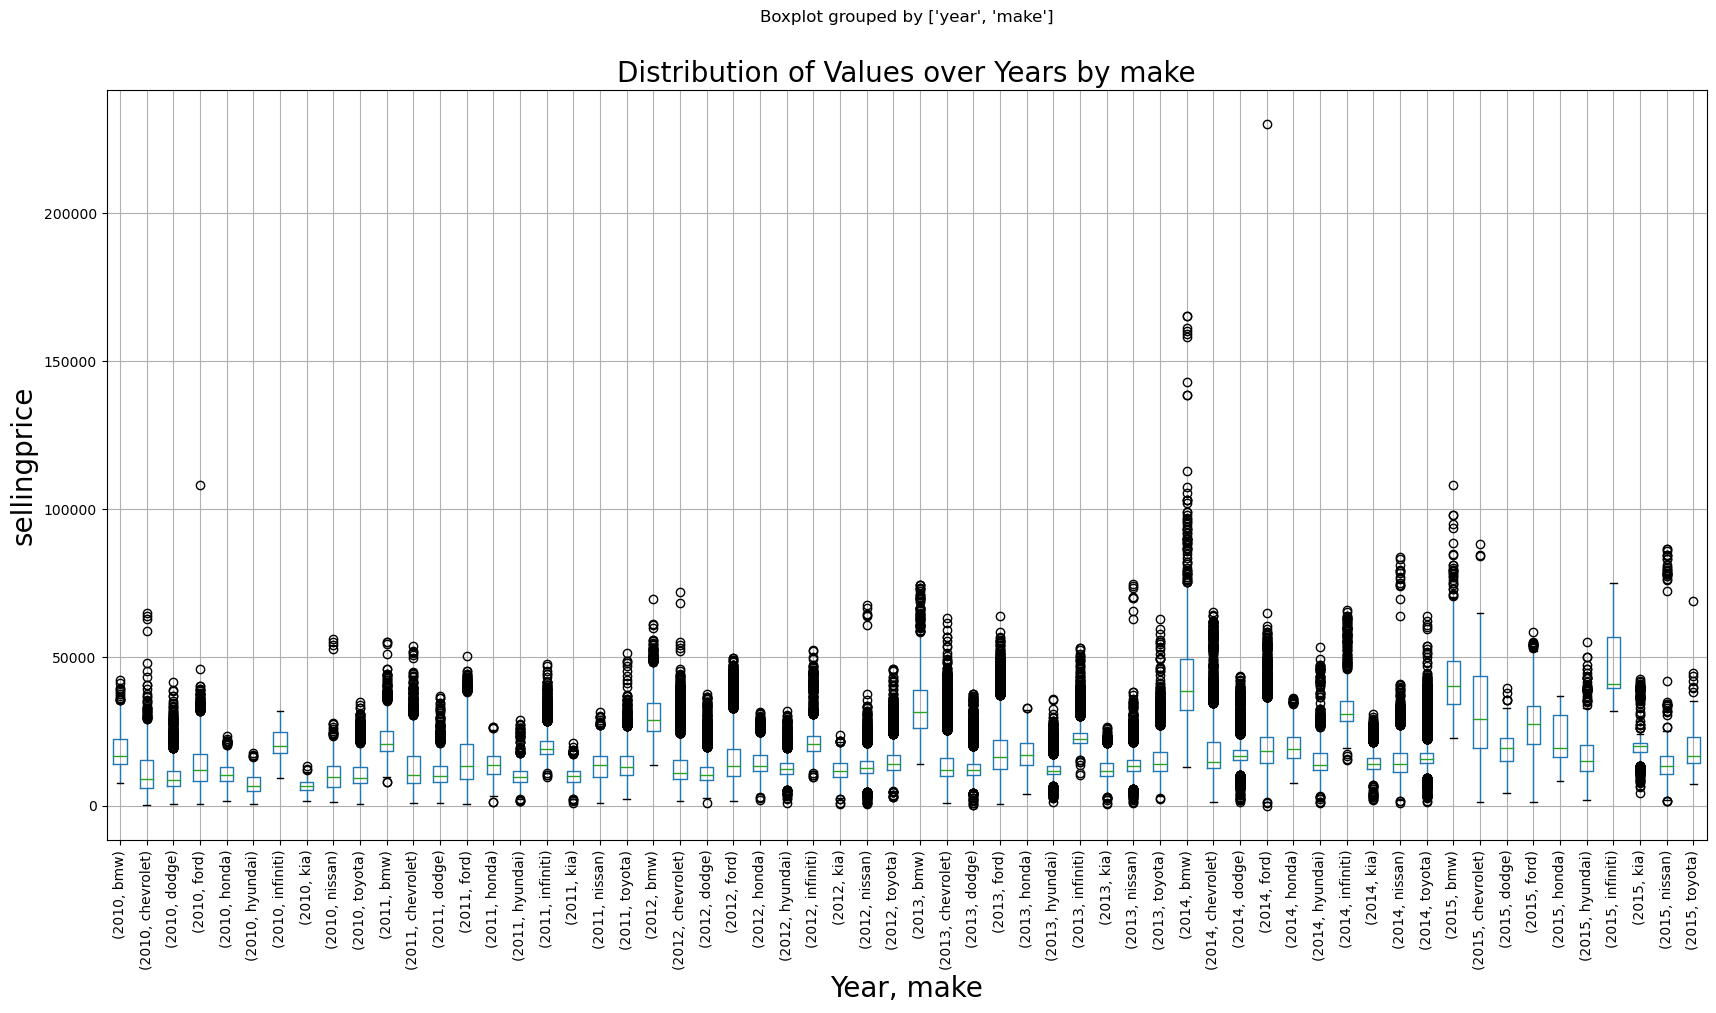

In [21]:
df4.boxplot(column='sellingprice', by=['year', 'make'], figsize=(20, 10))
plt.title('Distribution of Values over Years by make', fontsize= 20)
plt.xlabel('Year, make',fontsize= 20)
plt.ylabel('sellingprice',fontsize= 20)
plt.xticks(rotation=90)
plt.show()

Sample narrative description.

* In every year, BMW make has the most spread and kia has the less spread in most of the years in sellingprice.